固体内拡散に関するPDE/Govenig equation
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right) \\
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{2}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

境界条件
\begin{equation*}
\frac{\partial C_s}{\partial r} \vert _{r=r_i} = 0 \\
- D_s\frac{\partial C_s}{\partial r} \vert _{r=r_0} = \frac{J_{Li}}{a_sF} \\
\end{equation*}

about J_Li
\begin{equation*}
J_{Li} = \frac{I}{A}.....\tt{(constant)}
\end{equation*}

In [21]:
import numpy as np
from scipy.integrate import odeint

In [33]:
# initial parameter
N, L = 200, 40 #長さL をN個に区切る
dr = L / N
t_max, t_div = 1000, 50
t = np.linspace(0, t_max, t_div) 
dt = t_max/t_div
r = np.linspace(0, N, L)
C0=1
Ds = 0.002
a_s = 0.2
F = 96500
J_Li = 0.1 #(mol/lsec-1)

#境界条件
dC_r_0_dr_0 = J_Li/a_s/F/-Ds

#import sys
#sys.setrecursionlimit(100)

In [23]:
#t = 0,  C(r, 0)
C_s = np.ones(L)*C0 #mol%

In [41]:
np.gradient(C_s, dr)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [45]:
for k in range(len(t)):
    C_s = np.append(C_s, dt*Ds*(2/r*np.gradient(C_s, dr) +  np.gradient(np.gradient(C_s, dr), dr))+ C_s, axis=0)
    #C_s[k+1] = dt*Ds*(2/r*np.gradient(C_s[k], dr) +  np.gardient(np.gradient(C_s[k], dr), dr))+ C_s[k]

C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


ValueError: operands could not be broadcast together with shapes (40,) (80,) 

In [ ]:
def d_Cs(r, t=0):
    dr =  L / N
    return Ds*(2/r*(r+1-r) + np.gardient((r+1-r)), dr))
    #return Ds*(2/r*d_Cs(dr, t) + np.gardient(d_Cs(dr, t), dr))

type(fig): <class 'matplotlib.figure.Figure'>


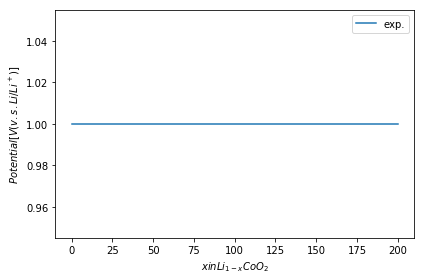

In [15]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(16,9))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
#ax3 = fig.add_subplot(121)
ax1 = fig.add_subplot(111)

#3 データを渡してプロット
ax1.plot(r, C_r_0, label='exp.')

ax1.set_xlabel("$x in Li_{1-x}CoO_2$")
ax1.set_ylabel("$Potential [V (v.s. Li/Li^+)]$")

ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)

In [34]:
def d_Cs(r, t):
    dr =  L / N
    return Ds*(2/r*d_Cs(dr, t) + np.gardient(d_Cs(dr, t), dr))

In [35]:
d_Cs(0, t) =  J_Li/a_s/F/-Ds

SyntaxError: can't assign to function call (<ipython-input-35-e8054500e02b>, line 1)

In [36]:
d_Cs(r, 0) = 1.0

SyntaxError: can't assign to function call (<ipython-input-36-2e81118c7041>, line 1)

In [ ]:
Cs =  odeint(d_Cs(r, t), d_Cs(r, 0), t, args=(N, L))